In [ ]:
# Введение в работу с данными на примере load_digits.


1. Примеры рукописных цифр из датасета load_digits



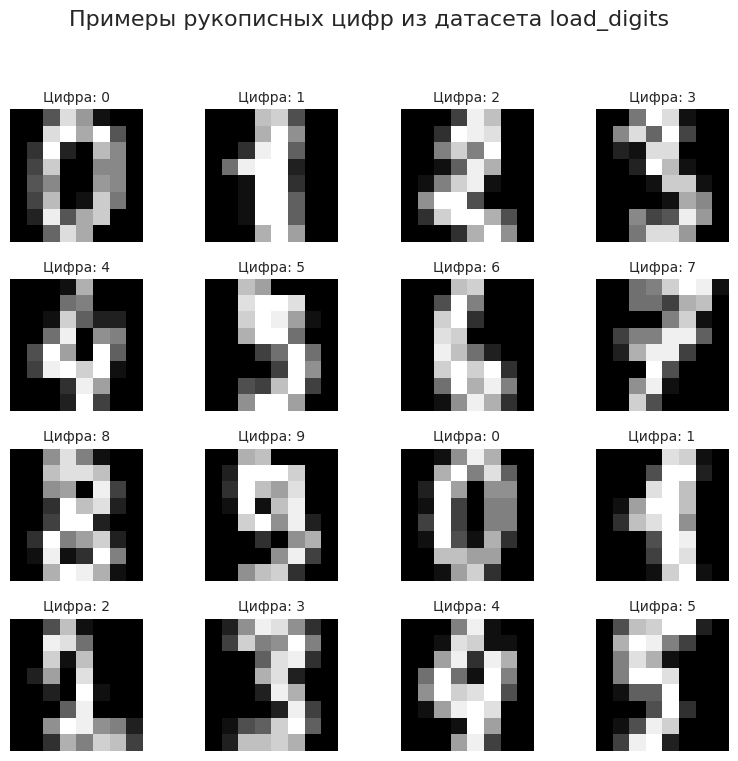


2. Распределение классов в датасете load_digits



<ipython-input-2-cf13512a527e>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, palette='viridis')


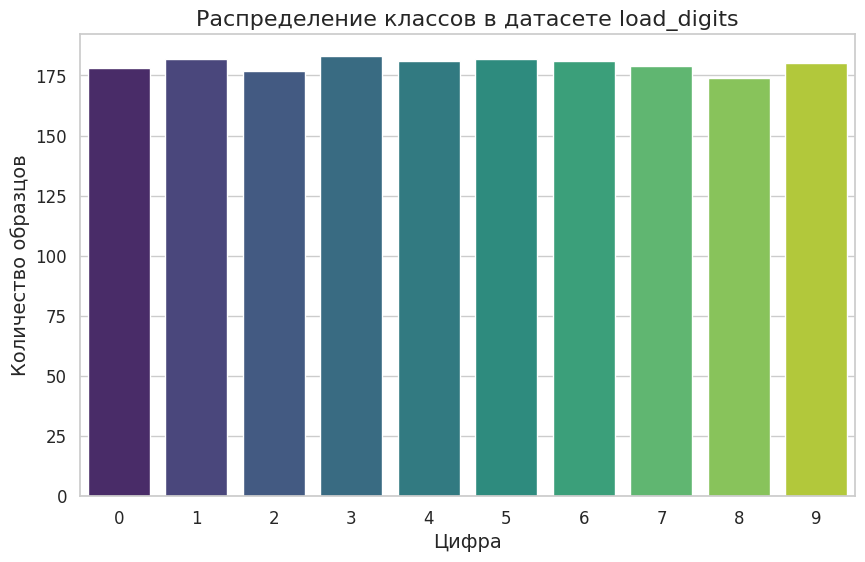


3. Понижение размерности с использованием PCA и t-SNE



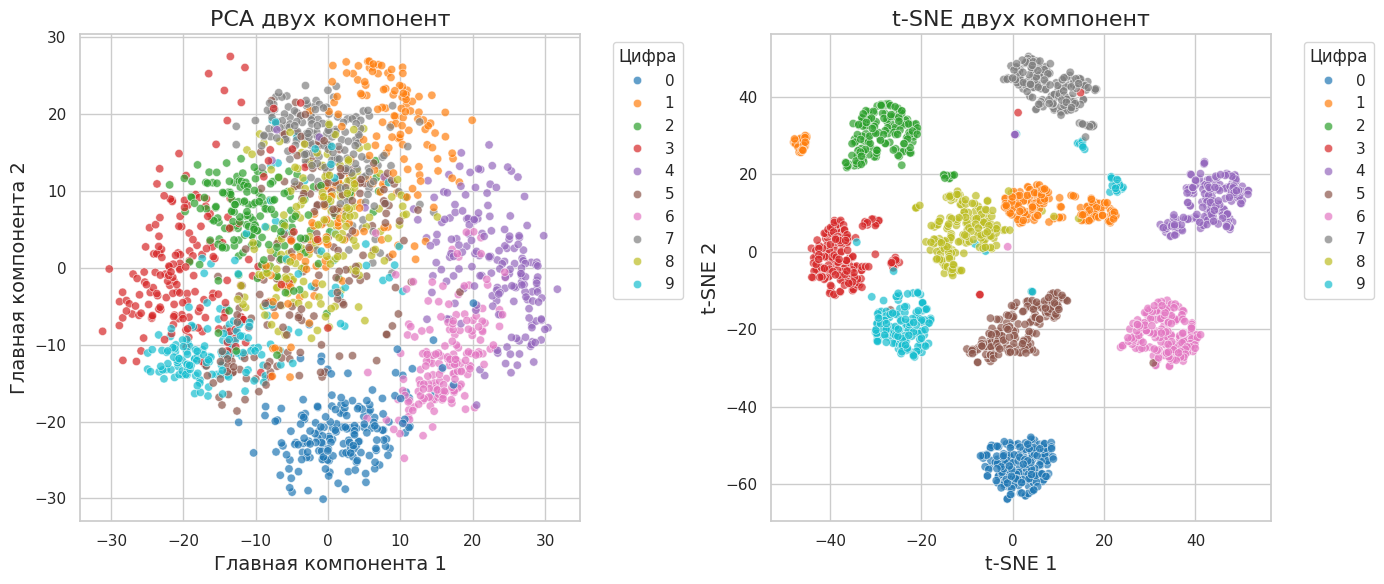


4. Средние изображения для каждого класса



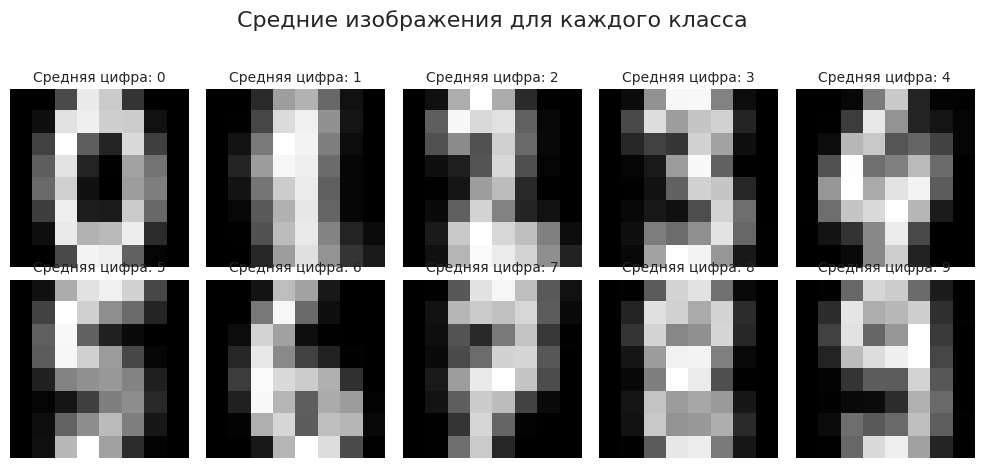


5. Тепловая карта корреляции признаков (первые 50 признаков)



/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


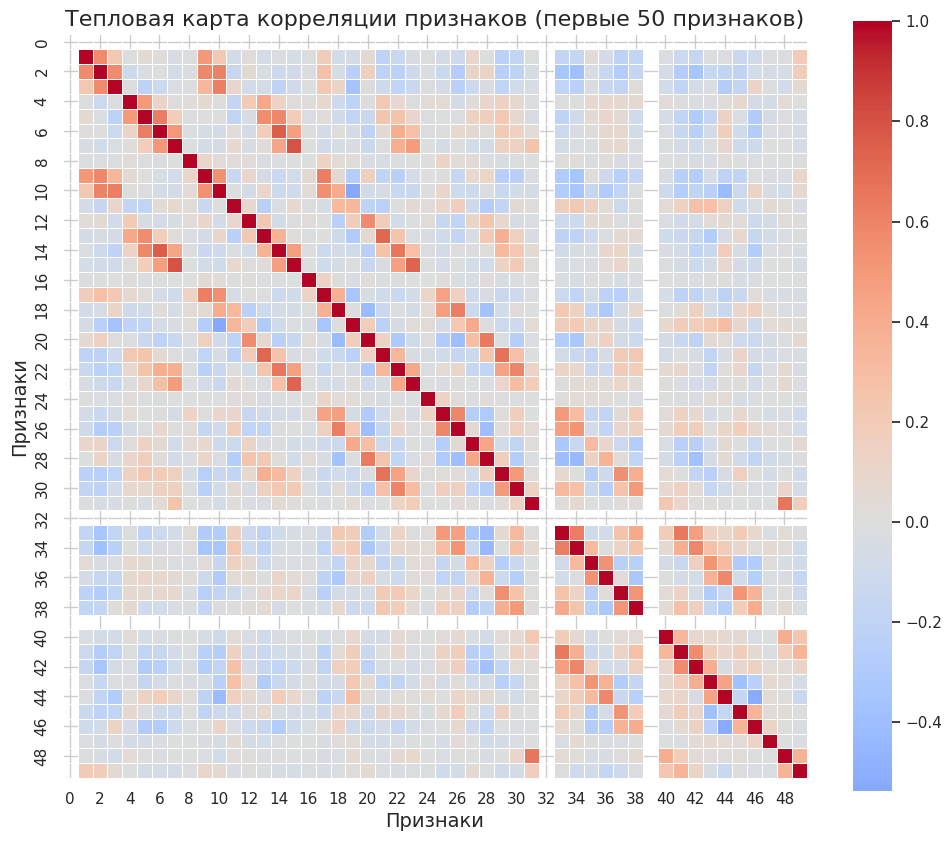


6. Распределение интенсивности выбранных пикселей



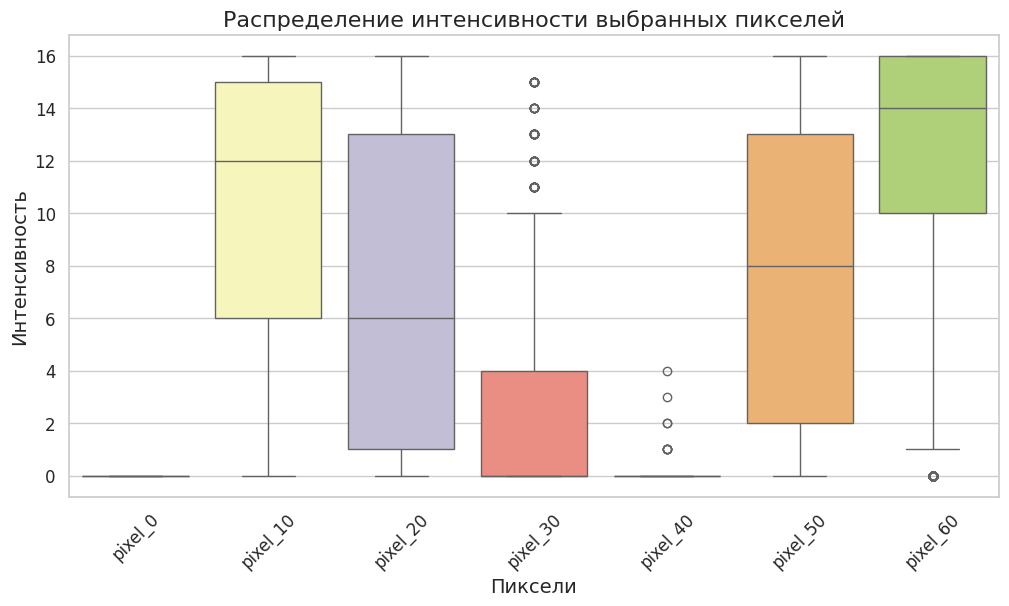

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np

# Настройки для графиков
sns.set(style='whitegrid', palette='muted', color_codes=True)
plt.rcParams['figure.figsize'] = (10, 8)

# Функция для вывода разделителей
def print_separator(title):
    print("\n" + "="*80)
    print(title)
    print("="*80 + "\n")

# Загрузка датасета
digits = load_digits()
X = digits.data
y = digits.target
images = digits.images

# 1. Визуализация примеров цифр из датасета
def plot_sample_digits(images, labels, num_samples=16):
    print_separator("1. Примеры рукописных цифр из датасета load_digits")
    plt.figure(figsize=(8, 8))
    plt.suptitle('Примеры рукописных цифр из датасета load_digits', fontsize=16)
    for i in range(num_samples):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'Цифра: {labels[i]}', fontsize=10)
        plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_sample_digits(images, y)

# 2. Распределение классов
def plot_class_distribution(labels):
    print_separator("2. Распределение классов в датасете load_digits")
    plt.figure(figsize=(10, 6))
    sns.countplot(x=labels, palette='viridis')
    plt.title('Распределение классов в датасете load_digits', fontsize=16)
    plt.xlabel('Цифра', fontsize=14)
    plt.ylabel('Количество образцов', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

plot_class_distribution(y)

# 3. Понижение размерности с использованием PCA и t-SNE
def plot_dimensionality_reduction(X, y):
    print_separator("3. Понижение размерности с использованием PCA и t-SNE")

    # PCA
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X)

    # t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    X_tsne = tsne.fit_transform(X)

    # Создание DataFrame для визуализации
    df_pca = pd.DataFrame({'PC1': X_pca[:, 0], 'PC2': X_pca[:, 1], 'Цифра': y})
    df_tsne = pd.DataFrame({'TSNE1': X_tsne[:, 0], 'TSNE2': X_tsne[:, 1], 'Цифра': y})

    # Визуализация PCA
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x='PC1', y='PC2', hue='Цифра', palette='tab10', data=df_pca, legend='full', alpha=0.7)
    plt.title('PCA двух компонент', fontsize=16)
    plt.xlabel('Главная компонента 1', fontsize=14)
    plt.ylabel('Главная компонента 2', fontsize=14)
    plt.legend(title='Цифра', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Визуализация t-SNE
    plt.subplot(1, 2, 2)
    sns.scatterplot(x='TSNE1', y='TSNE2', hue='Цифра', palette='tab10', data=df_tsne, legend='full', alpha=0.7)
    plt.title('t-SNE двух компонент', fontsize=16)
    plt.xlabel('t-SNE 1', fontsize=14)
    plt.ylabel('t-SNE 2', fontsize=14)
    plt.legend(title='Цифра', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

plot_dimensionality_reduction(X, y)

# 4. Средние изображения для каждого класса
def plot_average_images(images, labels, num_classes=10):
    print_separator("4. Средние изображения для каждого класса")
    average_images = []
    for i in range(num_classes):
        average = images[labels == i].mean(axis=0)
        average_images.append(average)

    plt.figure(figsize=(10, 5))
    plt.suptitle('Средние изображения для каждого класса', fontsize=16)
    for i, avg_img in enumerate(average_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(avg_img, cmap='gray')
        plt.title(f'Средняя цифра: {i}', fontsize=10)
        plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_average_images(images, y)

# 5. Тепловая карта корреляции признаков
def plot_correlation_heatmap(X):
    print_separator("5. Тепловая карта корреляции признаков (первые 50 признаков)")
    # Выбор первых 50 признаков для упрощения визуализации
    corr_matrix = np.corrcoef(X[:1000].T)  # Используем первые 1000 образцов для вычисления корреляции
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, cmap='coolwarm', center=0, square=True, linewidths=.5)
    plt.title('Тепловая карта корреляции признаков (первые 50 признаков)', fontsize=16)
    plt.xlabel('Признаки', fontsize=14)
    plt.ylabel('Признаки', fontsize=14)
    plt.show()

plot_correlation_heatmap(X[:, :50])  # Визуализируем первые 50 признаков

# 6. Распределение значений пикселей
def plot_pixel_intensity_distribution(X):
    print_separator("6. Распределение интенсивности выбранных пикселей")
    plt.figure(figsize=(12, 6))
    # Преобразуем данные в DataFrame для удобства
    df_pixels = pd.DataFrame(X, columns=[f'pixel_{i}' for i in range(X.shape[1])])
    # Выбираем несколько пикселей для визуализации
    selected_pixels = df_pixels.iloc[:, [0, 10, 20, 30, 40, 50, 60]]
    sns.boxplot(data=selected_pixels, palette='Set3')
    plt.title('Распределение интенсивности выбранных пикселей', fontsize=16)
    plt.xlabel('Пиксели', fontsize=14)
    plt.ylabel('Интенсивность', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

plot_pixel_intensity_distribution(X)


In [ ]:
# Работа с файлами

In [ ]:
!pip install openpyxl

In [ ]:
!pip install pyyaml

In [ ]:
!pip install pyarrow

In [ ]:
# Чтение и запись текстового файла (TXT):
import os

file_path = "example.txt"

# Проверка на существование файла и создание, если он не существует
if not os.path.exists(file_path):
    with open(file_path, "w") as file:
        file.write("Пример текста в файле")

# Чтение текстового файла
with open(file_path, "r") as file:
    content = file.read()
    print(content)

# Запись в текстовый файл
with open(file_path, "a") as file:
    file.write("\nНовый текст")


Пример текста в файле
Новый текст


In [ ]:
# Чтение и запись CSV файла
import csv

file_path = "example.csv"

if not os.path.exists(file_path):
    with open(file_path, "w", newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Имя", "Возраст"])
        writer.writerow(["Анна", 25])
        writer.writerow(["Петр", 30])

with open(file_path, "r", newline='') as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)

# Запись в CSV файл
with open(file_path, "a", newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Новое имя", 35])

['Имя', 'Возраст']
['Анна', '25']
['Петр', '30']
['Новое имя', '35']


In [ ]:
# Чтение и запись Excel файла (XLSX)
import openpyxl

file_path = "example.xlsx"

if not os.path.exists(file_path):
    workbook = openpyxl.Workbook()
    sheet = workbook.active
    sheet["A1"] = "Имя"
    sheet["B1"] = "Возраст"
    sheet["A2"] = "Анна"
    sheet["B2"] = 25
    sheet["A3"] = "Петр"
    sheet["B3"] = 30
    workbook.save(file_path)

workbook = openpyxl.load_workbook(file_path)
sheet = workbook.active
for row in sheet.iter_rows(values_only=True):
    print(row)

# Запись в Excel файл
new_workbook = openpyxl.Workbook()
new_sheet = new_workbook.active
new_sheet["A1"] = "Новое имя"
new_sheet["B1"] = 35
new_workbook.save("new_example.xlsx")

('Имя', 'Возраст')
('Анна', 25)
('Петр', 30)


In [ ]:
# Чтение и запись JSON файла
import json

file_path = "example.json"

if not os.path.exists(file_path):
    data = {"имена": ["Анна", "Петр"], "возрасты": [25, 30]}
    with open(file_path, "w") as file:
        json.dump(data, file)

with open(file_path, "r") as file:
    data = json.load(file)
    print(data)

# Запись в JSON файл
new_data = {"новое имя": "Ирина", "новый возраст": 28}
with open(file_path, "w") as file:
    json.dump(new_data, file)


{'новое имя': 'Ирина', 'новый возраст': 28}


In [ ]:
# Чтение и запись XML файла
import xml.etree.ElementTree as ET

file_path = "example.xml"

if not os.path.exists(file_path):
    root = ET.Element("people")
    person1 = ET.SubElement(root, "person")
    name1 = ET.SubElement(person1, "name")
    name1.text = "Анна"
    age1 = ET.SubElement(person1, "age")
    age1.text = "25"

    person2 = ET.SubElement(root, "person")
    name2 = ET.SubElement(person2, "name")
    name2.text = "Петр"
    age2 = ET.SubElement(person2, "age")
    age2.text = "30"

    tree = ET.ElementTree(root)
    tree.write(file_path)

tree = ET.parse(file_path)
root = tree.getroot()
for person in root.findall("person"):
    name = person.find("name").text
    age = person.find("age").text
    print(f"Имя: {name}, Возраст: {age}")

# Запись в XML файл
new_person = ET.Element("person")
new_name = ET.SubElement(new_person, "name")
new_name.text = "Ирина"
new_age = ET.SubElement(new_person, "age")
new_age.text = "28"
root.append(new_person)
tree.write(file_path)

Имя: Анна, Возраст: 25
Имя: Петр, Возраст: 30
Имя: Ирина, Возраст: 28


In [ ]:
# Чтение и запись Parquet файла с использованием библиотеки pyarrow
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd

file_path = "example.parquet"

# Проверка на существование файла и создание, если он не существует
if not os.path.exists(file_path):
    table = pa.Table.from_pandas(pd.DataFrame({'имя': ['Анна', 'Петр'], 'возраст': [25, 30]}))
    pq.write_table(table, file_path)
else:
    table = pq.read_table(file_path)

# Чтение Parquet файла
df = table.to_pandas()
print(df)

# Создание новой таблицы и объединение с существующей
new_df = pd.DataFrame({'имя': ['Ирина'], 'возраст': [28]})
new_table = pa.Table.from_pandas(new_df)
table = pa.concat_tables([table, new_table])

# Перезапись Parquet файла
pq.write_table(table, file_path)



     имя  возраст
0   Анна       25
1   Петр       30
2  Ирина       28


In [ ]:
# Методы и инструменты для обработки данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Загрузка датасета
digits = load_digits()

In [ ]:
# Преобразование данных в DataFrame
data = pd.DataFrame(data=np.c_[digits.data, digits.target], columns=list(range(64)) + ['target'])

In [ ]:
print(data.head())
print(data.describe())

     0    1    2     3     4     5    6    7    8    9  ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63  target  
0  6.0  13.0  10.0   0.0  0.0  0.0     0.0  
1  0.0  11.0  16.0  10.0  0.0  0.0     1.0  
2  0.0   3.0  11.0  16.0  9.0  0.0     2.0  
3  7.0  13.0  13.0   9.0  0.0  0.0     3.0  
4  0.0   2.0  16.0   4.0  0.0  0.0     4.0  

[5 rows x 65 columns]
            0            1            2            3            4  \
count  1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean      0.0     0.303840     5.204786    11.835838    11.848080   
std       0.0     0.907192     

In [ ]:
# Подготовка данных
X = data.drop('target', axis=1)  # Признаки
y = data['target']  # Целевая переменная

In [ ]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Обучение модели (в данном случае, метод ближайших соседей)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Оценка модели
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")

Точность модели: 0.9888888888888889


In [ ]:
# Отчет о классификации
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        53
         1.0       0.98      1.00      0.99        50
         2.0       1.00      1.00      1.00        47
         3.0       0.98      1.00      0.99        54
         4.0       0.98      1.00      0.99        60
         5.0       0.99      1.00      0.99        66
         6.0       1.00      1.00      1.00        53
         7.0       1.00      0.98      0.99        55
         8.0       0.98      0.98      0.98        43
         9.0       0.98      0.93      0.96        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



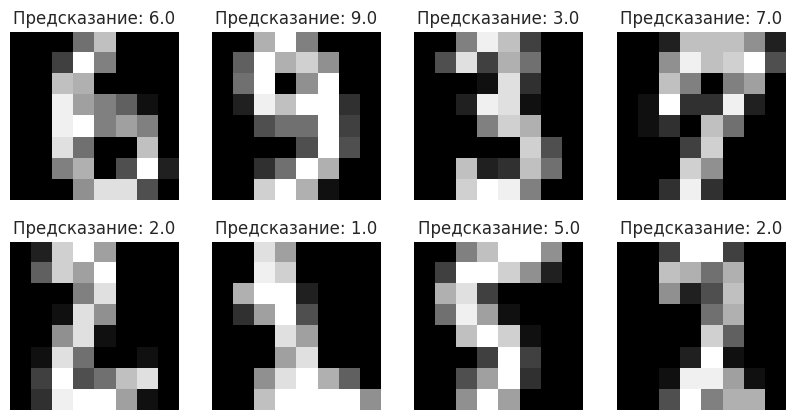

In [ ]:
# Визуализация нескольких изображений
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_test.iloc[i].values.reshape(8, 8), cmap='gray')
    ax.set_title(f"Предсказание: {y_pred[i]}")
    ax.axis('off')
plt.show()

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Загрузка набора данных
digits = load_digits()

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

# Стандартизация признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание и обучение классификатора
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Оценка модели
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
conf_matrix

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  3,  1],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]])

In [ ]:
# Вывод результатов
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.91      0.89      0.90        35
           2       0.97      0.97      0.97        36
           3       0.97      1.00      0.98        29
           4       0.97      1.00      0.98        30
           5       0.97      0.93      0.95        40
           6       1.00      0.98      0.99        44
           7       1.00      0.97      0.99        39
           8       0.92      0.92      0.92        39
           9       0.91      0.98      0.94        41

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

Confusion Matrix:
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  3  1]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  3]
 [

In [ ]:
### Типы баз данных ###

In [ ]:
# Реляционная База Данных: SQLite
import sqlite3

# Подключение к базе данных SQLite
conn = sqlite3.connect('example.db')
cursor = conn.cursor()

# Создание таблицы
cursor.execute('''CREATE TABLE IF NOT EXISTS users (id INTEGER PRIMARY KEY, name TEXT, age INTEGER)''')

# Вставка данных
cursor.execute("INSERT INTO users (name, age) VALUES ('Alice', 30)")

# Запрос данных
cursor.execute("SELECT * FROM users")
print(cursor.fetchall())

# Закрытие соединения
conn.commit()
conn.close()


[(1, 'Alice', 30), (2, 'Alice', 30)]


In [ ]:
import sqlite3

# Подключение к SQLite базе данных (или создание, если не существует)
conn = sqlite3.connect('mydatabase.db')
cursor = conn.cursor()

# Создание таблицы "users"
cursor.execute('''CREATE TABLE IF NOT EXISTS users (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    username TEXT UNIQUE NOT NULL,
    email TEXT UNIQUE NOT NULL,
    age INTEGER,
    created_at TIMESTAMP DEFAULT CURRENT_TIMESTAMP
)''')

# Вставка разнообразных данных
users_data = [
    ('john_doe', 'john@example.com', 30),
    ('jane_doe', 'jane@example.com', 25),
    ('alice', 'alice@example.com', 28),
    ('bob', 'bob@example.com', 35),
]

try:
    cursor.executemany("INSERT INTO users (username, email, age) VALUES (?, ?, ?)", users_data)
    conn.commit()
except sqlite3.IntegrityError:
    print("Ошибка: Попытка вставить дублирующиеся записи")

# Запрос данных
cursor.execute("SELECT * FROM users")
users = cursor.fetchall()
for user in users:
    print(user)

# Обновление данных
cursor.execute("UPDATE users SET age = ? WHERE username = ?", (40, 'john_doe'))
conn.commit()

# Удаление данных
cursor.execute("DELETE FROM users WHERE username = ?", ('jane_doe',))
conn.commit()

# Закрытие соединения
conn.close()


Ошибка: Попытка вставить дублирующиеся записи
(1, 'john_doe', 'john@example.com', 40, '2024-10-24 11:04:14')
(3, 'alice', 'alice@example.com', 28, '2024-10-24 11:04:14')
(4, 'bob', 'bob@example.com', 35, '2024-10-24 11:04:14')


In [ ]:
#SELECT (Извлечение данных):
import sqlite3

conn = sqlite3.connect('mydatabase.db')
cursor = conn.cursor()

# Пример 1: Выбор всех записей из таблицы "users"
cursor.execute("SELECT * FROM users")
result = cursor.fetchall()
for row in result:
    print(row)

# Пример 2: Выбор определенных столбцов и фильтрация результатов
cursor.execute("SELECT username, age FROM users WHERE age > 30")
result = cursor.fetchall()
for row in result:
    print(row)

conn.close()


(1, 'john_doe', 'john@example.com', 40, '2024-10-24 11:04:14')
(3, 'alice', 'alice@example.com', 28, '2024-10-24 11:04:14')
(4, 'bob', 'bob@example.com', 35, '2024-10-24 11:04:14')
('john_doe', 40)
('bob', 35)


In [ ]:
# UPDATE (Обновление данных):
import sqlite3

conn = sqlite3.connect('mydatabase.db')
cursor = conn.cursor()

# Обновление данных в таблице "users" для определенной записи
cursor.execute("UPDATE users SET age = 32 WHERE username = 'new_user'")

conn.commit()
conn.close()

In [ ]:
# DELETE (Удаление данных):
import sqlite3

conn = sqlite3.connect('mydatabase.db')
cursor = conn.cursor()

# Удаление записи из таблицы "users" по определенному условию
cursor.execute("DELETE FROM users WHERE username = 'new_user'")

conn.commit()
conn.close()


In [ ]:
# CREATE TABLE (Создание таблицы):
import sqlite3

conn = sqlite3.connect('mydatabase.db')
cursor = conn.cursor()

# Создание новой таблицы "orders" с несколькими столбцами
cursor.execute('''CREATE TABLE IF NOT EXISTS orders (
    order_id INTEGER PRIMARY KEY,
    customer_id INTEGER,
    order_date DATE,
    total_amount DECIMAL(10, 2)
)''')

conn.commit()
conn.close()


In [ ]:
import sqlite3

conn = sqlite3.connect('mydatabase.db')
cursor = conn.cursor()

# Создание новой таблицы "orders" с несколькими столбцами
cursor.execute('''CREATE TABLE IF NOT EXISTS orders (
    order_id INTEGER PRIMARY KEY,
    customer_id INTEGER,
    order_date DATE,
    total_amount DECIMAL(10, 2)
)''')

# Добавление нового столбца "status" в таблицу "orders"
cursor.execute("ALTER TABLE orders ADD COLUMN status TEXT")

conn.commit()
conn.close()


In [ ]:
# DROP TABLE (Удаление таблицы)
import sqlite3

conn = sqlite3.connect('mydatabase.db')
cursor = conn.cursor()

# Удаление таблицы "orders"
cursor.execute("DROP TABLE IF EXISTS orders")

conn.commit()
conn.close()